<Event(32774-WindowShown {'window': None})> 32774


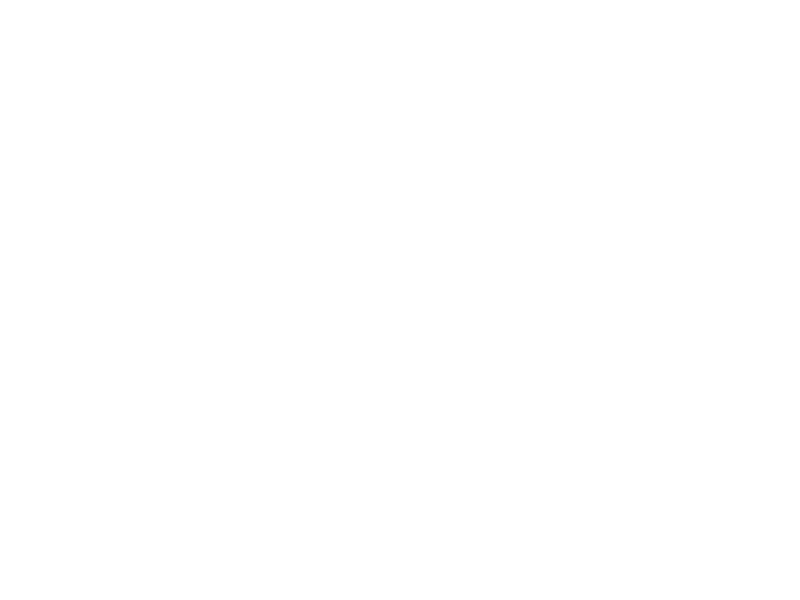

In [7]:
import os
import pygame
from PIL import Image

# 配置环境变量以使用 xvfb 虚拟显示器
os.environ["SDL_VIDEODRIVER"] = "dummy"
os.environ["DISPLAY"] = ":1"

# 初始化 PyGame
pygame.init()

# 设置窗口大小和标题
screen = pygame.display.set_mode((800, 600))
pygame.display.set_caption("PyGame Environment Rendering")

# 绘制内容并保存截图
running = True
while running:
    for event in pygame.event.get():
        print(event,event.type)
        if event.type == pygame.QUIT:
            running = False

    screen.fill((255, 255, 255))  # 填充白色背景
    pygame.display.flip()

    # 保存屏幕截图
    pygame.image.save(screen, "screenshot.png")
    running = False

pygame.quit()

# 显示截图
img = Image.open("screenshot.png")
img.show()

In [13]:
from smac.env import StarCraft2Env
import numpy as np


def main():
    env = StarCraft2Env(map_name="8m")
    env_info = env.get_env_info()

    n_actions = env_info["n_actions"]
    n_agents = env_info["n_agents"]

    n_episodes = 10

    for e in range(n_episodes):
        env.reset()
        terminated = False
        episode_reward = 0

        while not terminated:
            obs = env.get_obs()
            state = env.get_state()
            # env.render()  # Uncomment for rendering

            actions = []
            for agent_id in range(n_agents):
                avail_actions = env.get_avail_agent_actions(agent_id)
                avail_actions_ind = np.nonzero(avail_actions)[0]
                action = np.random.choice(avail_actions_ind)
                actions.append(action)

            reward, terminated, _ = env.step(actions)
            episode_reward += reward

        print("Total reward in episode {} = {}".format(e, episode_reward))

    env.close()


In [12]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from os import replace

from smacv2.env import StarCraft2Env
import numpy as np
from absl import logging
import time

from smacv2.env.starcraft2.wrapper import StarCraftCapabilityEnvWrapper

logging.set_verbosity(logging.DEBUG)

def main():

    distribution_config = {
        "n_units": 5,
        "n_enemies": 5,
        "team_gen": {
            "dist_type": "weighted_teams",
            "unit_types": ["marine", "marauder", "medivac"],
            "exception_unit_types": ["medivac"],
            "weights": [0.45, 0.45, 0.1],
            "observe": True,
        },
        "start_positions": {
            "dist_type": "surrounded_and_reflect",
            "p": 0.5,
            "n_enemies": 5,
            "map_x": 32,
            "map_y": 32,
        },
    }
    env = StarCraftCapabilityEnvWrapper(
        capability_config=distribution_config,
        map_name="10gen_terran",
        debug=True,
        conic_fov=False,
        obs_own_pos=True,
        use_unit_ranges=True,
        min_attack_range=2,
    )

    env_info = env.get_env_info()

    n_actions = env_info["n_actions"]
    n_agents = env_info["n_agents"]

    n_episodes = 10

    print("Training episodes")
    for e in range(n_episodes):
        env.reset()
        terminated = False
        episode_reward = 0

        while not terminated:
            obs = env.get_obs()
            state = env.get_state()
            # env.render()  # Uncomment for rendering

            actions = []
            for agent_id in range(n_agents):
                avail_actions = env.get_avail_agent_actions(agent_id)
                avail_actions_ind = np.nonzero(avail_actions)[0]
                action = np.random.choice(avail_actions_ind)
                actions.append(action)

            reward, terminated, _ = env.step(actions)
            time.sleep(0.15)
            episode_reward += reward
        print("Total reward in episode {} = {}".format(e, episode_reward))

ModuleNotFoundError: No module named 'smacv2'

In [14]:
main()

AttributeError: module 'websocket' has no attribute 'WebSocketConnectionClosedException'